# Projet d'analyse de fraude

Par Théo DESLAGE et Maximilien GOMAS

## Exploration et visualisation des données

On peut constater que les données sont divisées en deux ensembles :
- Le premier, labelisé, servira à l'apprentissage supervisé (Entrainement et test)
- Le second, inconnu, représente une situation réelle dans laquelle nous devrons prédire à l'aide de notre modèle

Chargeons les données

In [5]:
fraudes <- read.csv("./data/Data_Projet_1.csv", header = TRUE, sep = ",", dec = ".", stringsAsFactors = TRUE)
head(fraudes)

,claim_id,customer_id,age,gender,incident_cause,days_to_incident,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
,<int>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<int>,<fct>
1,54004764,21868593,32,Female,Driver error,225,Auto,No,Material only,2980.0,1,No
2,33985796,75740424,60,Female,Crime,11874,Home,Unknown,Material only,2980.0,3,No
3,53522022,30308357,27,Female,Other driver error,4,Auto,No,Material only,3369.5,1,Yes
4,13015401,47830476,39,Female,Natural causes,5278,Auto,No,Material only,1680.0,1,No
5,22890252,19269962,47,Male,Crime,2335,Auto,No,Material only,2680.0,1,No
6,24050443,21831191,36,Male,Other driver error,2116,Auto,No,Injury only,38306.5,3,Yes


Nous allons maintenant explorer les données et comprendre quelles features sont déterminantes pour la prédiction de la fraude.

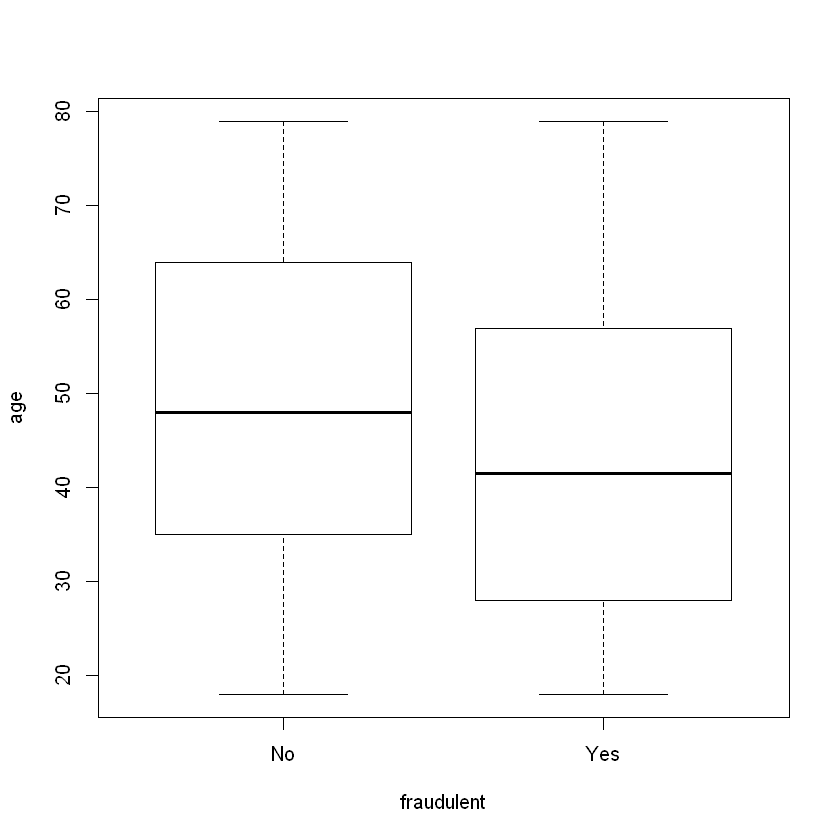

In [7]:
boxplot(age~fraudulent, data=fraudes)

On peut constater que les déclarations frauduleuses concernent un publique plus jeune que celles qui ne le sont pas.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



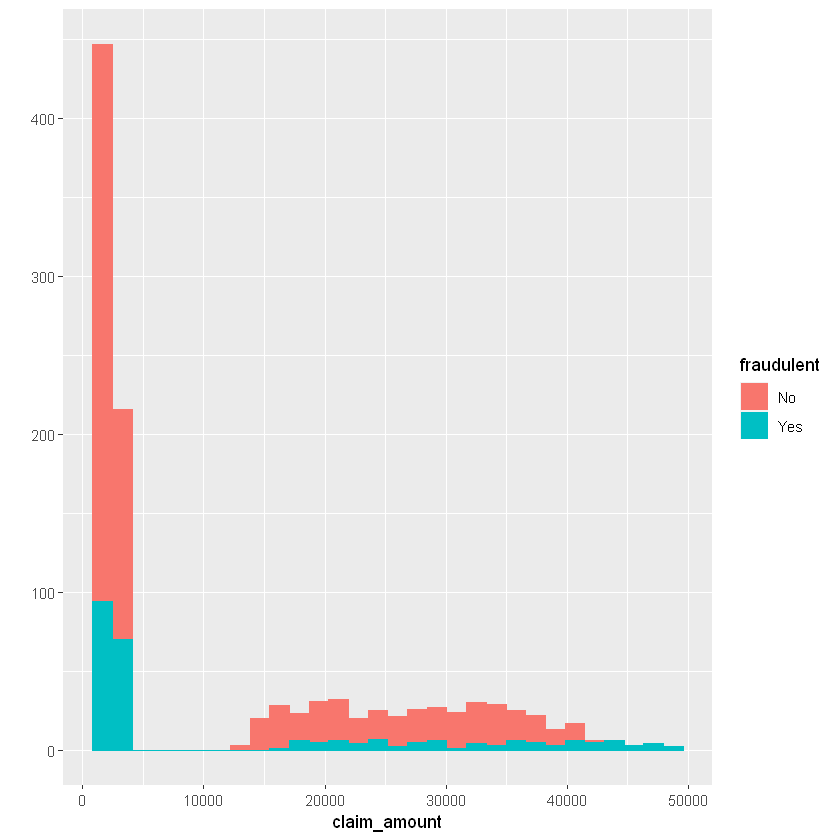

In [14]:
library(ggplot2)
qplot(claim_amount, data=fraudes, color=fraudulent, fill=fraudulent)

On décide de séparer les claim_amount (supérieur et inférieur à 10000) pour mieux visualiser les tendances.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



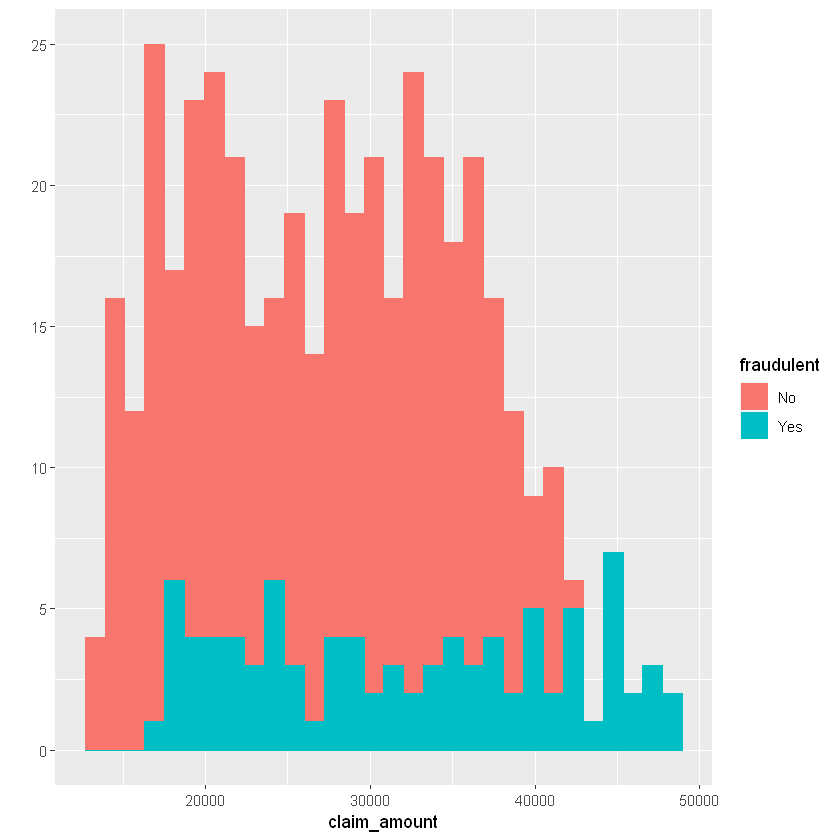

In [17]:
library(ggplot2)
qplot(claim_amount, data=fraudes[fraudes$claim_amount>10000,], color=fraudulent, fill=fraudulent)

On remarque qu'au dessus de 43k, toutes les ransactions sont frauduleuses. Nous décidons d'enlever les valeurs au dessus de 43k lors du pré traitement des données, car notre arbre fera inéluctablement une corrélation qui nous semble plus lié au jeu de donnée qu'à une représentation de la réalité.

Pour confirmer notre raisonnement on compte le nombre de transactions concernées, et on se rend compte que c'est assez faible (15/1100)

In [20]:
nrow(fraudes)
nrow(fraudes[fraudes$claim_amount>43000,])

[1] 1100

[1] 15

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



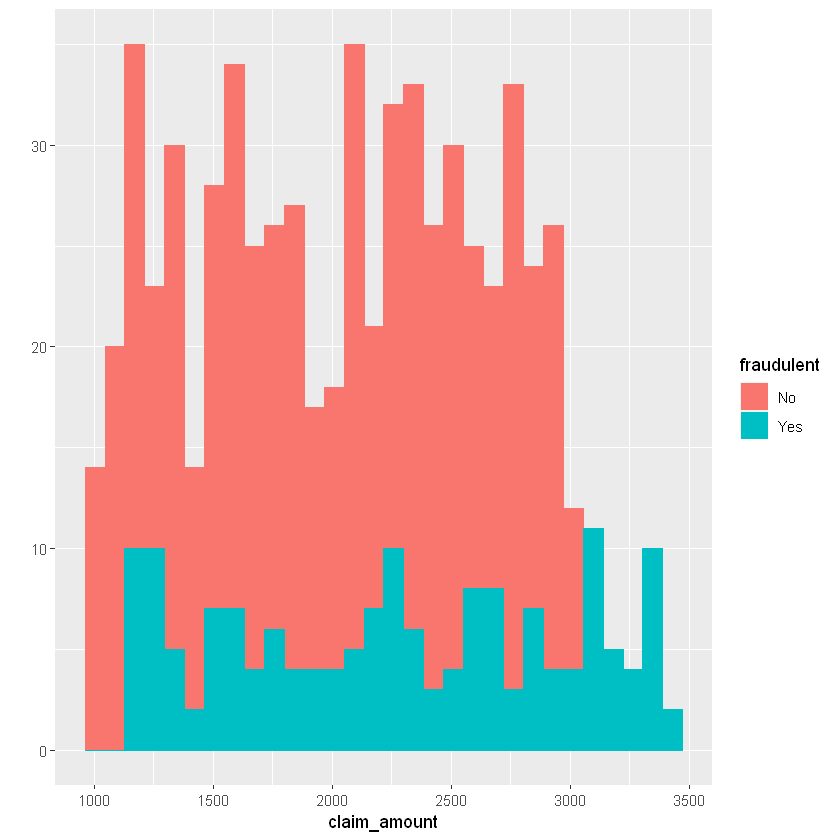

In [15]:
qplot(claim_amount, data=fraudes[fraudes$claim_amount<10000,], color=fraudulent, fill=fraudulent)

## Pré traitement des données

On sait que deux variables ne sont pas pertinentes dans la prédiction, l'ID de la transaction *claim_id* puisqu'il est unique et le numéro d'utilisateur *customer_id*. On pourrait établir un modèle qui prend en compte le *customer_id* pour "suspecter" ceux qui ont déjà fraudé. Mais dans ce cas de la détection de nouvelles fraudes l'utilisateur sera très probablement nouveau, il ne faut pas que cela altère le jugement du modèle, qui doit se méfier de tout le monde, sans distinction.

Comme prévu au chapitre précédent nous supprimons les transactions à plus de 43k€

## Définition de la méthode d'évaluation des classifieurs

## Définition des données d'apprentissage et de test

## Construction et évaluation du classifieur

## Choix du classifieur le plus performant

## Application du classifieur aux données à prédire